In [1]:
import random 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def create_vector(size_of_individuals):
    return [random.randint(0,1) for _ in range(size_of_individuals)]

In [3]:
def create_population(size_of_population, size_of_individual):
    return [create_vector(size_of_individual) for _ in range(size_of_population)]

In [33]:
def compute_fitness(individuals):
    return sum(individuals)

In [34]:
size_of_individuals = 10
size_of_population = 8

In [35]:
vector = create_vector(size_of_individuals)
vector

[1, 0, 0, 1, 1, 0, 0, 0, 1, 1]

In [36]:
population = create_population(size_of_population, size_of_individuals)
population

[[1, 0, 0, 1, 1, 1, 1, 0, 0, 0],
 [1, 1, 1, 1, 0, 1, 0, 1, 0, 1],
 [0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
 [1, 1, 0, 0, 0, 0, 1, 0, 0, 1],
 [1, 1, 0, 1, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
 [0, 1, 0, 1, 0, 0, 0, 1, 0, 1],
 [0, 1, 0, 1, 0, 0, 0, 1, 1, 0]]

In [40]:
result = [compute_fitness(individuals) for individuals in population]
result

[5, 7, 2, 4, 4, 5, 4, 4]

In [56]:
def selection_better(population):
    sorted_vector = sorted(population , key=lambda x: compute_fitness(x), reverse=True)
    new_population = []
    index1= random.randint(0, len(sorted_vector)-1)
    index2= random.randint(0, len(sorted_vector)-1)
    while index1== index2:
        index2== random.randint(0, size_of_individuals-1)
    
    if compute_fitness(sorted_vector[index1])  > compute_fitness(sorted_vector[index2]):
        winner= sorted_vector[index1].copy()
    else:
        winner= sorted_vector[index2].copy()
    return winner

result= selection_better(population)
print(result)

[1, 0, 0, 1, 1, 1, 1, 0, 0, 0]


In [57]:
def cross_over(parent1, parent2, population):
    sorted_vector = sorted(population , key=lambda x: compute_fitness(x), reverse=True)
    point= random.randint(0, len(population)-1)
    child1= parent1[:point] +parent2[point:]
    child2= parent2[:point] + parent1[point:]

    if population is not None:
        population.append(child1)
        population.append(child2)

    return child1, child2

In [17]:
def mutation(vector1, vector2, size_of_individuals):

    index = random.randint(0, size_of_individuals - 1)
    # Chọn tới khi khác nhau
    while vector1[index] == vector2[index]:
        index = random.randint(0, size_of_individuals - 1)
    vector1[index]= 1-vector1[index]
    vector2[index]= 1-vector2[index]
    return vector1 , vector2




In [ ]:
def adding_elitisms(population , elitisms=2):

    sorted_vector = sorted(population, key= lambda x:compute_fitness(x), reversed= True)
    elitisms_add= sorted_vector[:elitisms]
    new_population= []
    new_population.extend[elitisms_add]


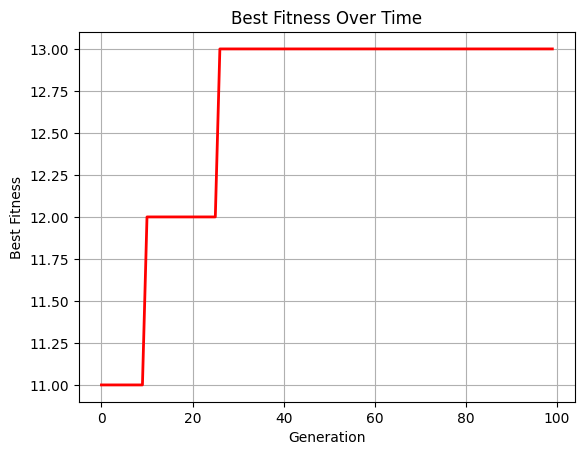

In [64]:
n_generations = 100
elitisms_rate = 2
population = create_population(size_of_population, size_of_individuals)
history = []

for i in range(n_generations):
    sorted_vector = sorted(population, key=lambda x: compute_fitness(x), reverse=True)
    
    # Track best fitness
    best_fitness = compute_fitness(sorted_vector[0])
    history.append(best_fitness)
    
    # Check convergence
    if best_fitness == size_of_individuals:
        break
    
    # Elitism
    new_population = []
    elitisms_add = sorted_vector[:elitisms_rate]
    new_population.extend(elitisms_add)
    
    # Selection + Crossover + Mutation
    while len(new_population) < size_of_population:
        # Selection từ population (không phải sorted_vector)
        index1 = random.randint(0, len(population) - 1)
        index2 = random.randint(0, len(population) - 1)
        while index1 == index2:
            index2 = random.randint(0, len(population) - 1)
        
        parent1 = sorted_vector[index1].copy()
        parent2 = sorted_vector[index2].copy()
        
        # Crossover
        crossover_point = random.randint(1, size_of_individuals - 1)
        child1 = parent1[:crossover_point] + parent2[crossover_point:]
        child2 = parent2[:crossover_point] + parent1[crossover_point:]
        
        # Mutation
        for j in range(size_of_individuals):
            if random.random() < 0.1:  # Tăng mutation rate
                child1[j] = 1 - child1[j]
            if random.random() < 0.1:
                child2[j] = 1 - child2[j]
        
        new_population.append(child1)
        if len(new_population) < size_of_population:
            new_population.append(child2)
    
    population = new_population


plt.plot(history, color='red', linewidth=2)
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Best Fitness Over Time')
plt.grid(True)
plt.show()

In [ ]:
plt.plot()